#### Import package

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline    

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

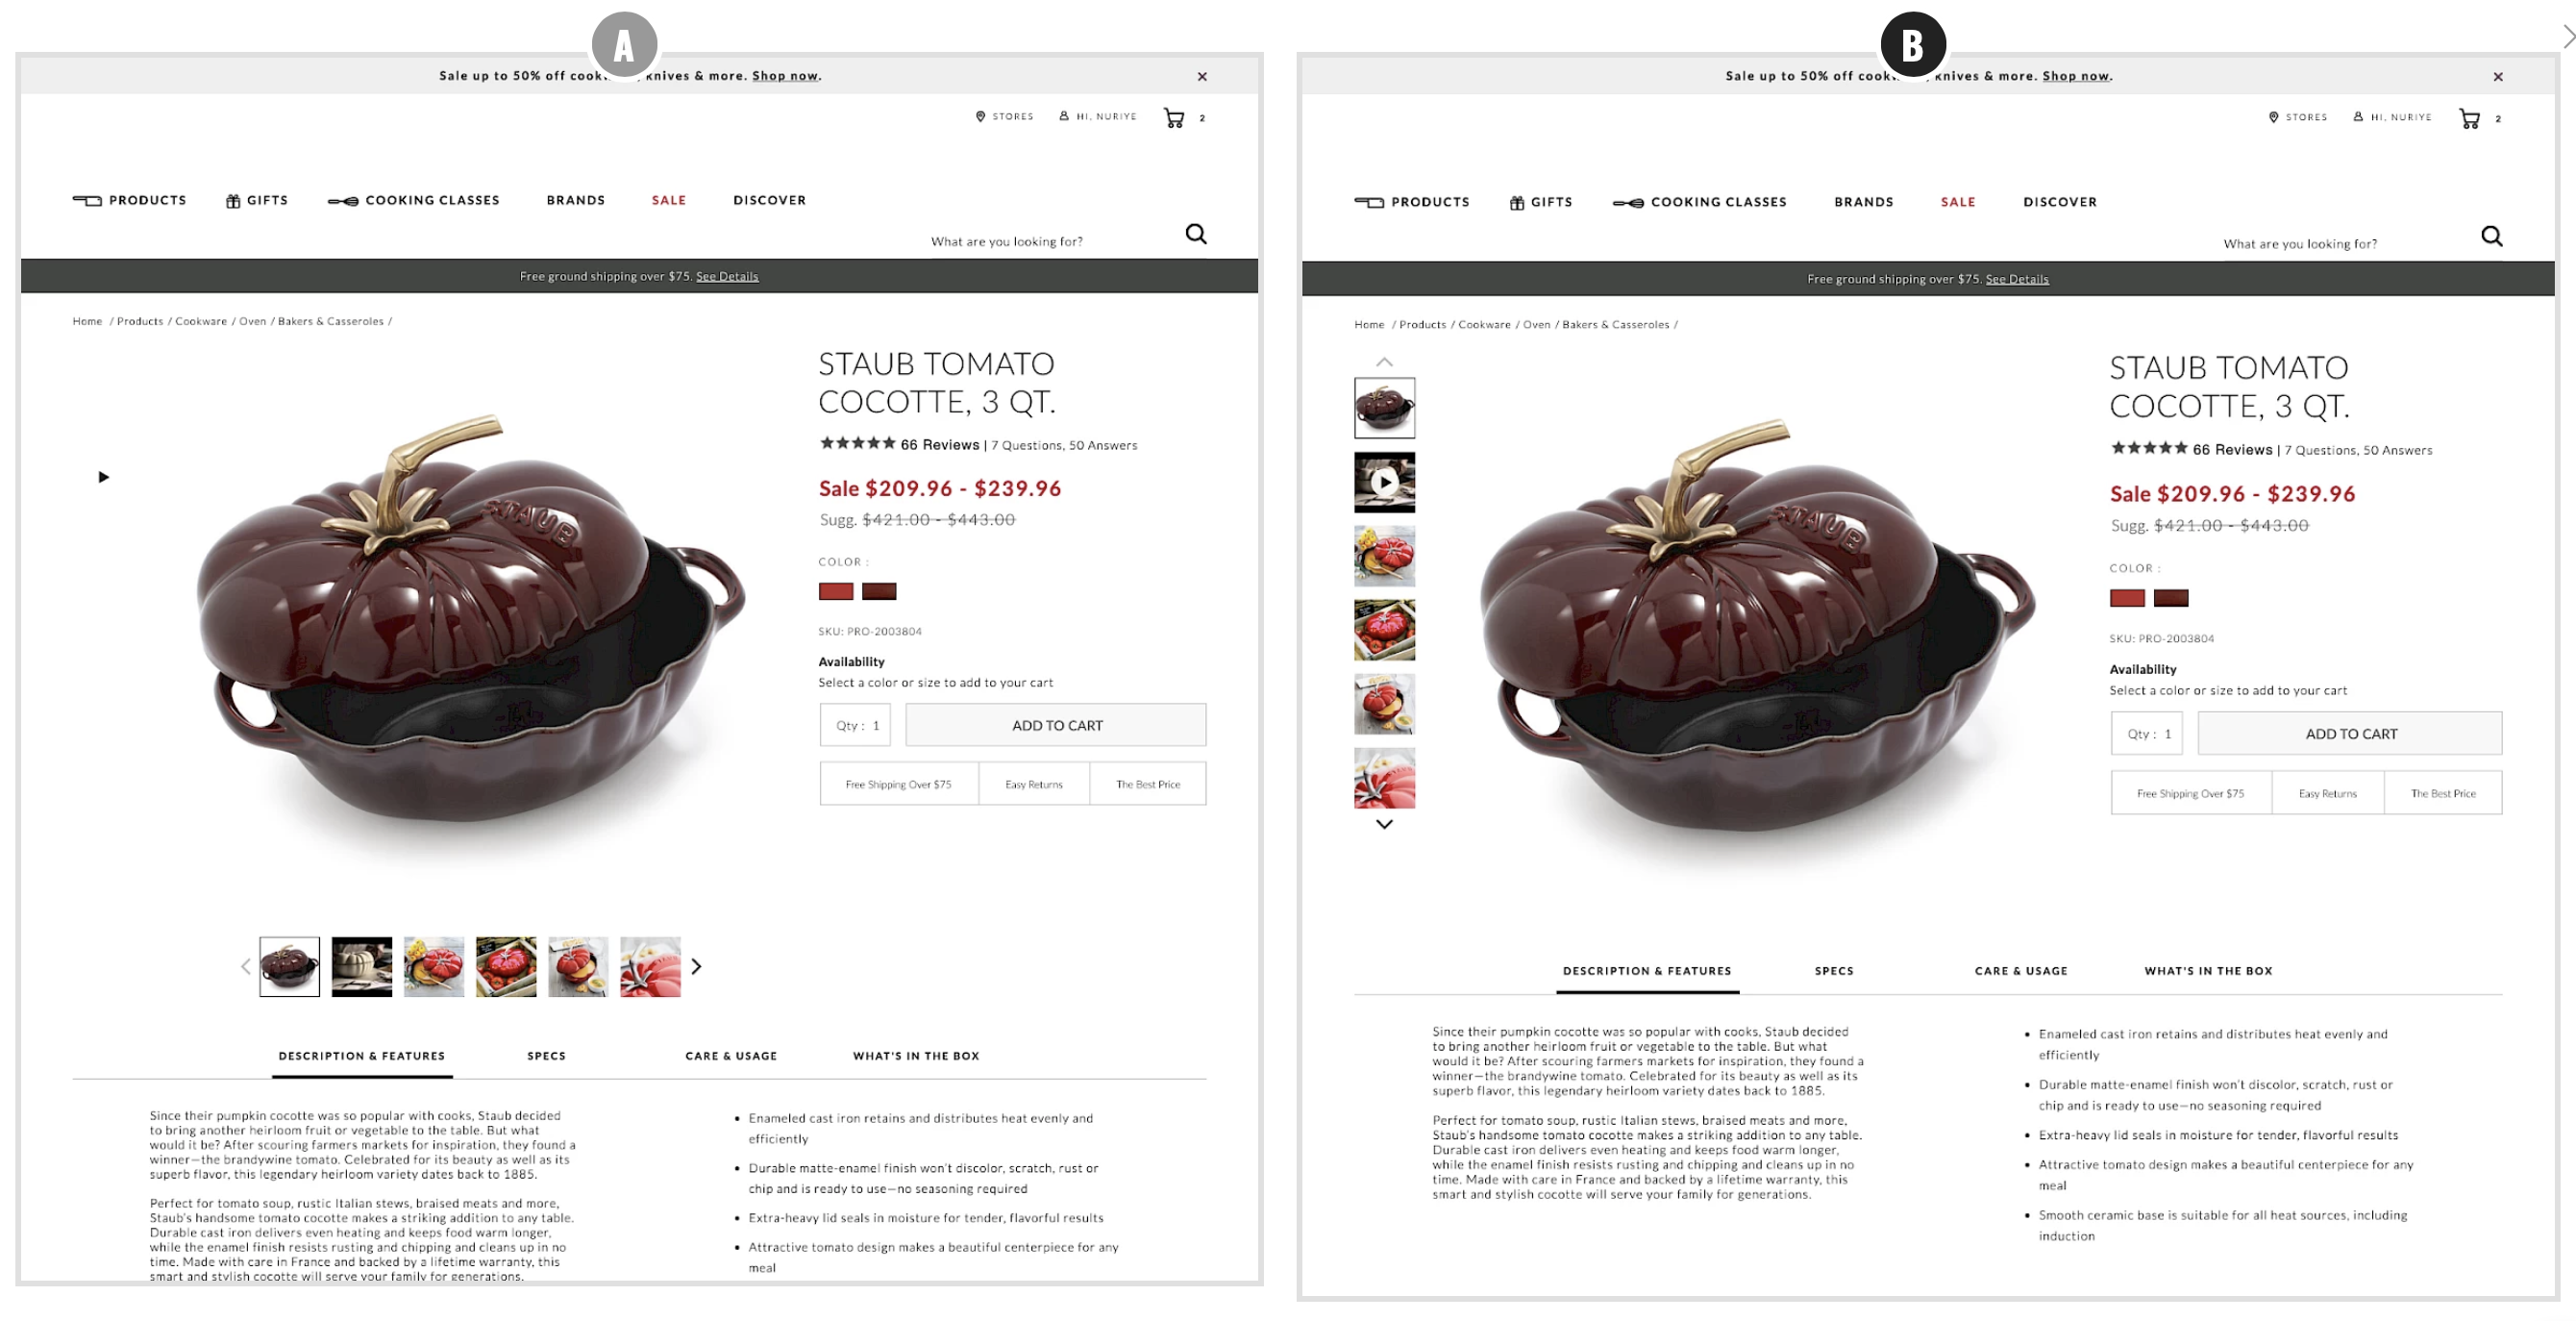

In [2]:
from PIL import Image 
Image.open('/Users/haiyanqin/Desktop/A:B Test -Ecommerce/a:b.png')

#### Load data

In [3]:
data='/Users/haiyanqin/Desktop/Maths Asessment/assessment_da25.csv'
df=pd.read_csv(data)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB
None
  Variant  Number of page views  GMV (in $)  Number of add to cart  \
0       A                     5         0.0                      0   
1       A                     4         0.0                      4   
2       A                     4         0.0                      2   
3       A                     5         0.0                      0   
4      

In [4]:
df.groupby('Variant').apply(lambda x: x.describe())

Number of page views   GMV (in $)  Number of add to cart  \
Variant                                                                   
A       count           1000.000000  1000.000000            1000.000000   
        mean               4.985000     7.689990               1.884000   
        std                2.236465    26.794816               1.297778   
        min                0.000000     0.000000               0.000000   
        25%                3.000000     0.000000               1.000000   
        50%                5.000000     0.000000               2.000000   
        75%                6.000000     0.000000               3.000000   
        max               12.000000   152.610000               8.000000   
B       count           1000.000000  1000.000000            1000.000000   
        mean               5.317000     9.289530               2.469000   
        std                2.417096    28.879687               1.660662   
        min                0.000000     0.000000               0.000000   
        25%                3.000000     0.000000               1.000000   
        50%                5.000000     0.000000               2.000000   
        75%                7.000000     0.000000               3.000000   
        max               15.000000   141.270000              10.000000   

               Clicks on media  Time on Page (sec)      user_id  
Variant                                                          
A       count      1000.000000         1000.000000  1000.000000  
        mean          1.495000           20.543000   499.500000  
        std           1.230239           20.596076   288.819436  
        min           0.000000            1.000000     0.000000  
        25%           1.000000            6.000000   249.750000  
        50%           1.000000           13.000000   499.500000  
        75%           2.000000           29.000000   749.250000  
        max           6.000000          143.000000   999.000000  
B       count      1000.000000         1000.000000  1000.000000  
        mean          1.324000           20.047000  1499.500000  
        std           1.180855           19.319784   288.819436  
        min           0.000000            1.000000  1000.000000  
        25%           0.000000            7.000000  1249.750000  
        50%           1.000000           14.000000  1499.500000  
        75%           2.000000           28.000000  1749.250000  
        max           7.000000          132.000000  1999.000000

#### Do users interacted with the media content?<br/>Do users bounced after this page?

In [5]:
# Create the 'interacted' column with binary value if users interacted on productpage by clicking on media,clicked=1,no click=0
df['Interacted'] = np.where(df['Clicks on media'] != 0, 1, 0)

# create 'Churned' column where users with less than 2 page view consider as churned=1, more than 2 page views=not churned=0
df['Churned'] = np.where(df['Number of page views'] <=1, 1, 0)
df

Variant  Number of page views  GMV (in $)  Number of add to cart  \
0          A                     5        0.00                      0   
1          A                     4        0.00                      4   
2          A                     4        0.00                      2   
3          A                     5        0.00                      0   
4          A                     5        0.00                      3   
...      ...                   ...         ...                    ...   
1995       B                     3        0.00                      1   
1996       B                     3        0.00                      1   
1997       B                     3        0.00                      2   
1998       B                     4       87.08                      2   
1999       B                     7        0.00                      5   

      Clicks on media  Time on Page (sec)  user_id  Interacted  Churned  
0                   2                  74        0           1        0  
1                   1                  21        1           1        0  
2                   0                   1        2           0        0  
3                   1                  26        3           1        0  
4                   3                  46        4           1        0  
...               ...                 ...      ...         ...      ...  
1995                0                   1     1995           0        0  
1996                2                  31     1996           1        0  
1997                0                   3     1997           0        0  
1998                1                  11     1998           1        0  
1999                6                  35     1999           1        0  

[2000 rows x 9 columns]

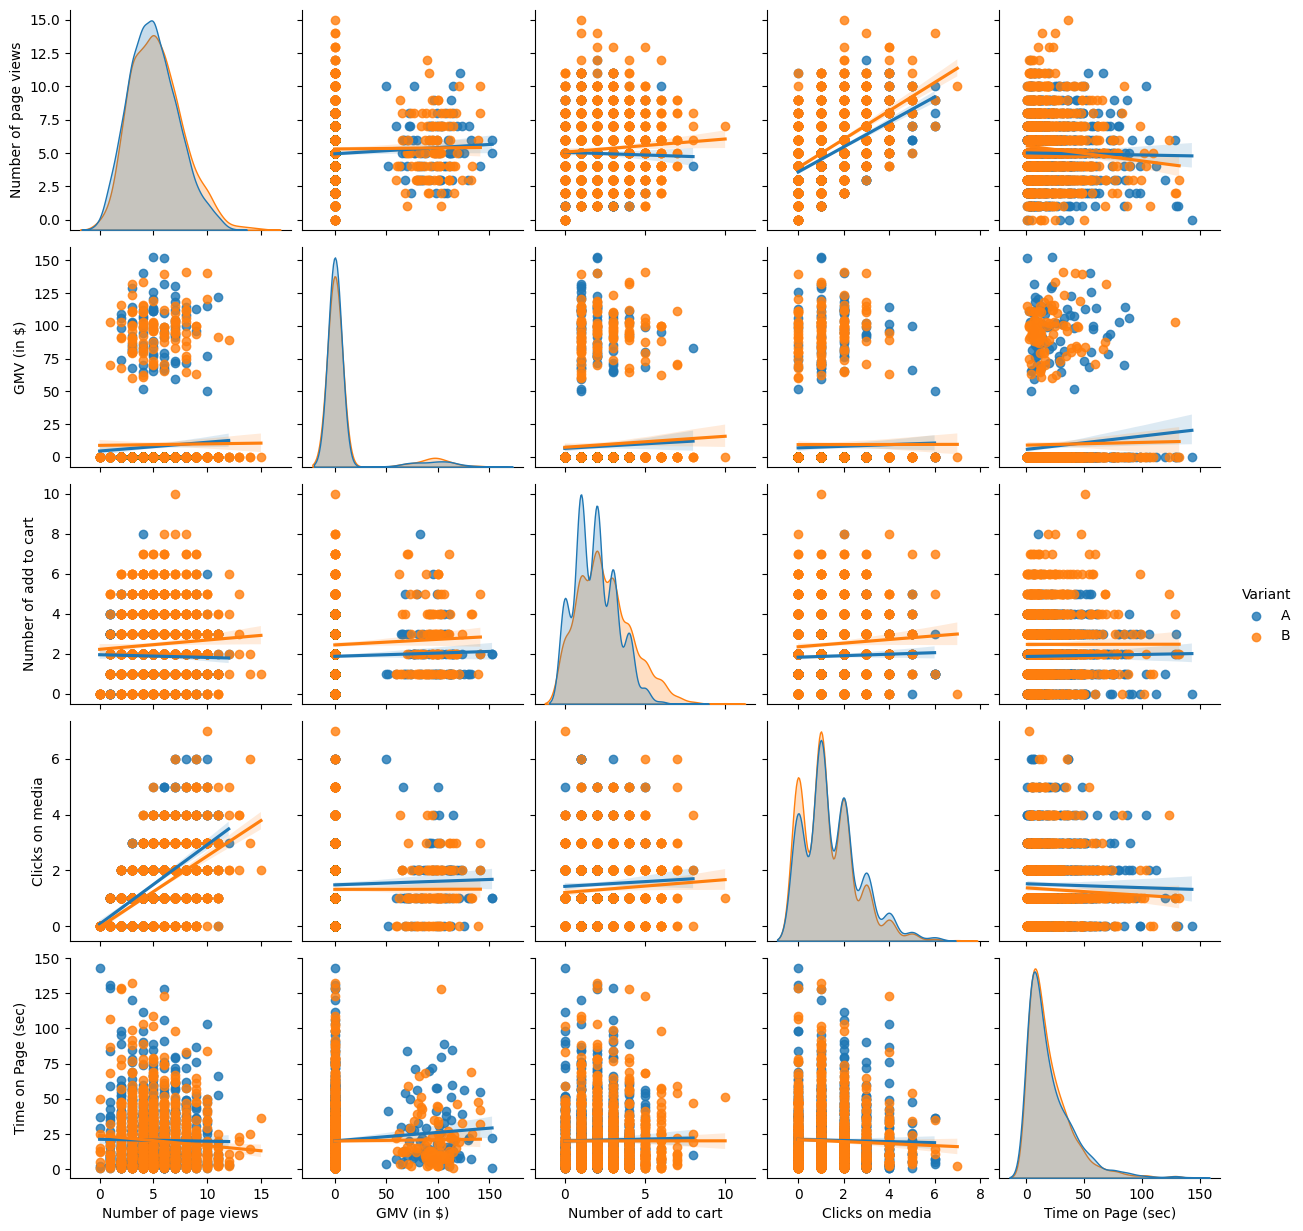

In [6]:
sns.pairplot(df[['Variant','Number of page views','GMV (in $)','Number of add to cart','Clicks on media','Time on Page (sec)']], hue='Variant',kind='reg')
plt.show()

In [7]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'A'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Converted data for further analysis

In [8]:
df2 = (df.groupby('Variant')
       .agg(n_users=('user_id', 'count'),
            n_clicks=('Clicks on media', 'sum'),
            n_pageview=('Number of page views', 'sum'),
            sum_time_on_page_sec=('Time on Page (sec)','sum'),
            users_add_to_cart=('user_id', lambda x: (x[df['Number of add to cart'] > 0]).nunique()),
            purchase_users=('user_id', lambda x: (x[df['GMV (in $)'] > 0]).nunique()),
            sum_purchase=('GMV (in $)', 'sum'),
            Interacted=('Interacted', 'sum'),
            Churned=('Churned', 'sum'))
       .reset_index())
df2

Variant  n_users  n_clicks  n_pageview  sum_time_on_page_sec  \
0       A     1000      1495        4985                 20543   
1       B     1000      1324        5317                 20047   

   users_add_to_cart  purchase_users  sum_purchase  Interacted  Churned  
0                857              80       7689.99         780       46  
1                896              97       9289.53         728       28

In [9]:
all_stat = df.pivot_table(index=['Variant', 'Interacted',],
                          columns=['Churned'], 
                          aggfunc={'GMV (in $)': ['sum', 'mean', 'median', 'count'],
                                   'Clicks on media': ['sum', 'mean', 'median', 'count'],
                                   'Number of page views': ['sum', 'mean', 'median', 'count'],
                                   'Time on Page (sec)': ['sum', 'mean', 'median', 'count'],
                                   'Number of add to cart': ['sum', 'mean', 'median', 'count']},
                          fill_value=0)
all_stat


Clicks on media                                           \
                             count          mean      median        sum       
Churned                          0   1         0    1      0    1     0   1   
Variant Interacted                                                            
A       0                      188  32  0.000000  0.0    0.0  0.0     0   0   
        1                      766  14  1.933420  1.0    2.0  1.0  1481  14   
B       0                      249  23  0.000000  0.0    0.0  0.0     0   0   
        1                      723   5  1.824343  1.0    2.0  1.0  1319   5   

                   GMV (in $)      ... Number of page views      \
                        count      ...                  sum       
Churned                     0   1  ...                    0   1   
Variant Interacted                 ...                            
A       0                 188  32  ...                  727  27   
        1                 766  14  ...                 4217  14   
B       0                 249  23  ...                 1042  16   
        1                 723   5  ...                 4254   5   

                   Time on Page (sec)                                         \
                                count           mean            median         
Churned                             0   1          0          1      0     1   
Variant Interacted                                                             
A       0                         188  32  18.882979  30.843750   12.0  18.0   
        1                         766  14  20.686684  11.428571   14.0   8.5   
B       0                         249  23  19.493976  20.608696   13.0  13.0   
        1                         723   5  20.201936  22.600000   14.0  10.0   

                                
                      sum       
Churned                 0    1  
Variant Interacted              
A       0            3550  987  
        1           15846  160  
B       0            4854  474  
        1           14606  113  

[4 rows x 40 columns]

### Are distributions differs between A and B?

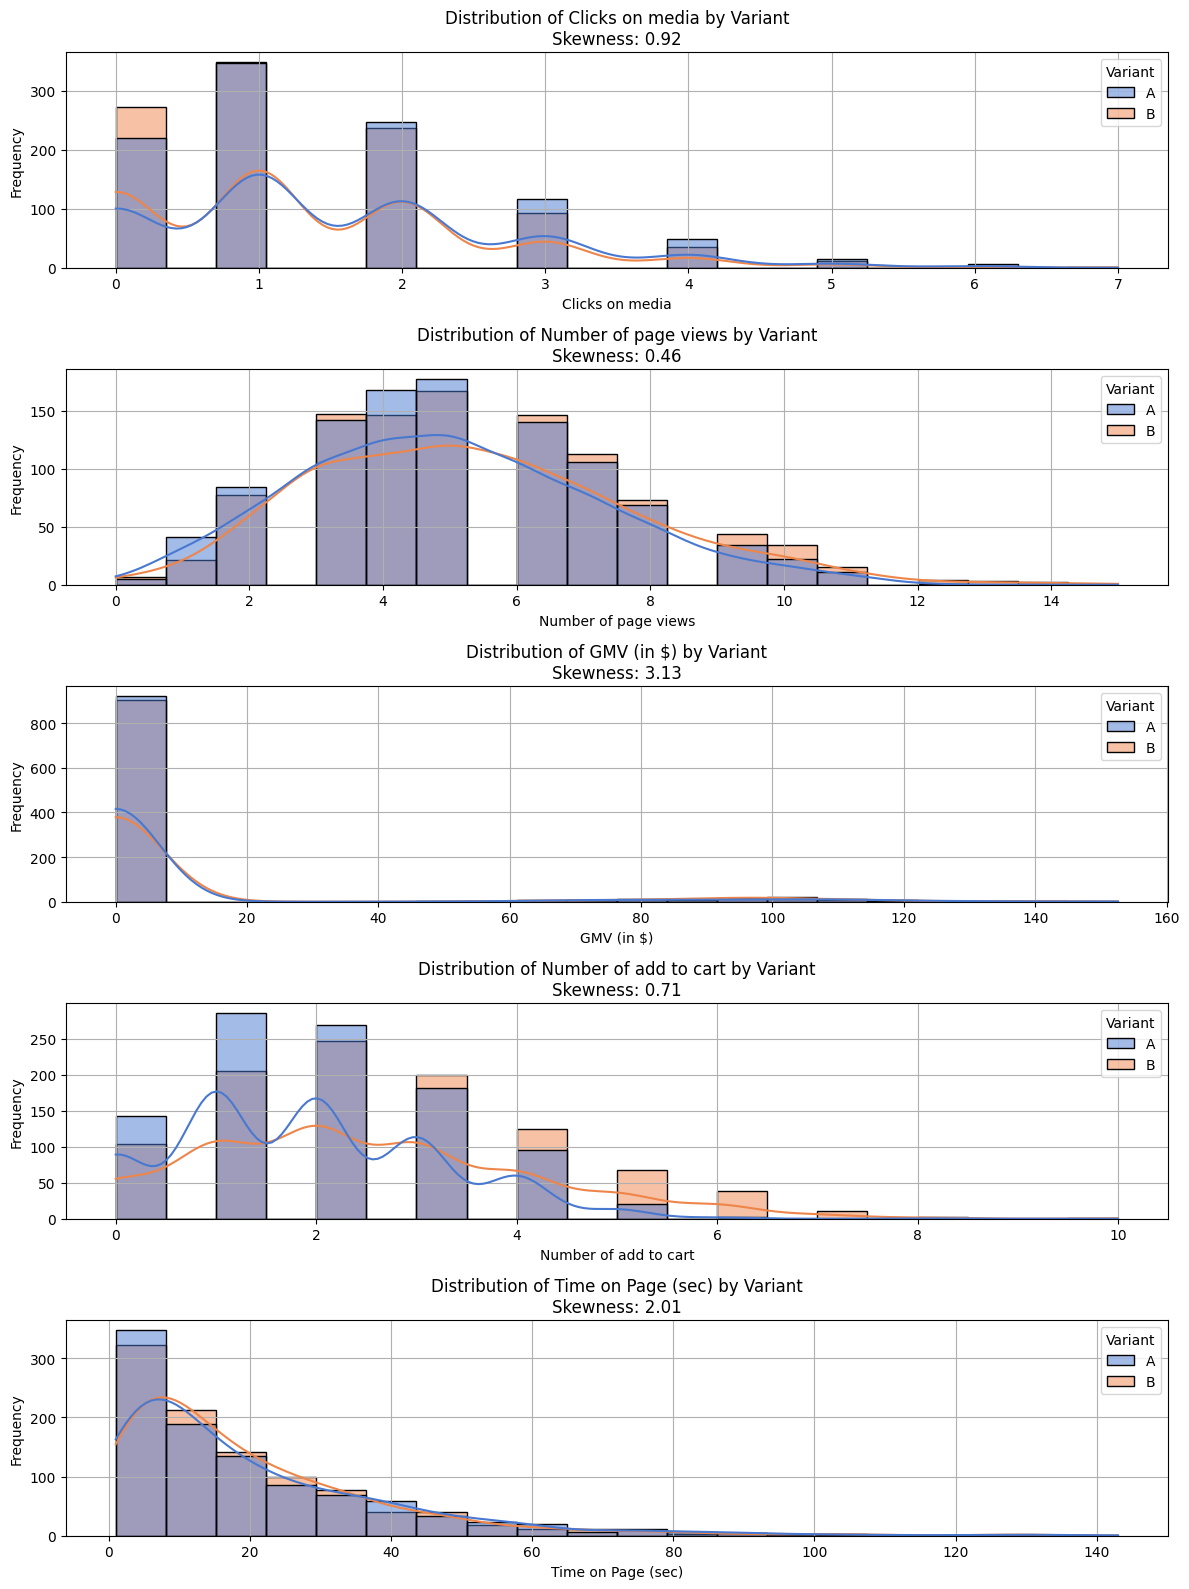

In [10]:
from scipy.stats import skew

columns_of_interest = ['Clicks on media', 'Number of page views', 'GMV (in $)', 'Number of add to cart', 'Time on Page (sec)']

fig, axes = plt.subplots(nrows=len(columns_of_interest), figsize=(12, 16))

for i, col in enumerate(columns_of_interest):
    sns.histplot(data=df, x=col, kde=True, hue='Variant', ax=axes[i], palette='muted', bins=20)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Calculate skewness for each column
    skewness = skew(df[col])
    
    # Add skewness to title
    axes[i].set_title(f'Distribution of {col} by Variant\nSkewness: {skewness:.2f}')
    
    axes[i].grid(True)

plt.tight_layout()
plt.show()

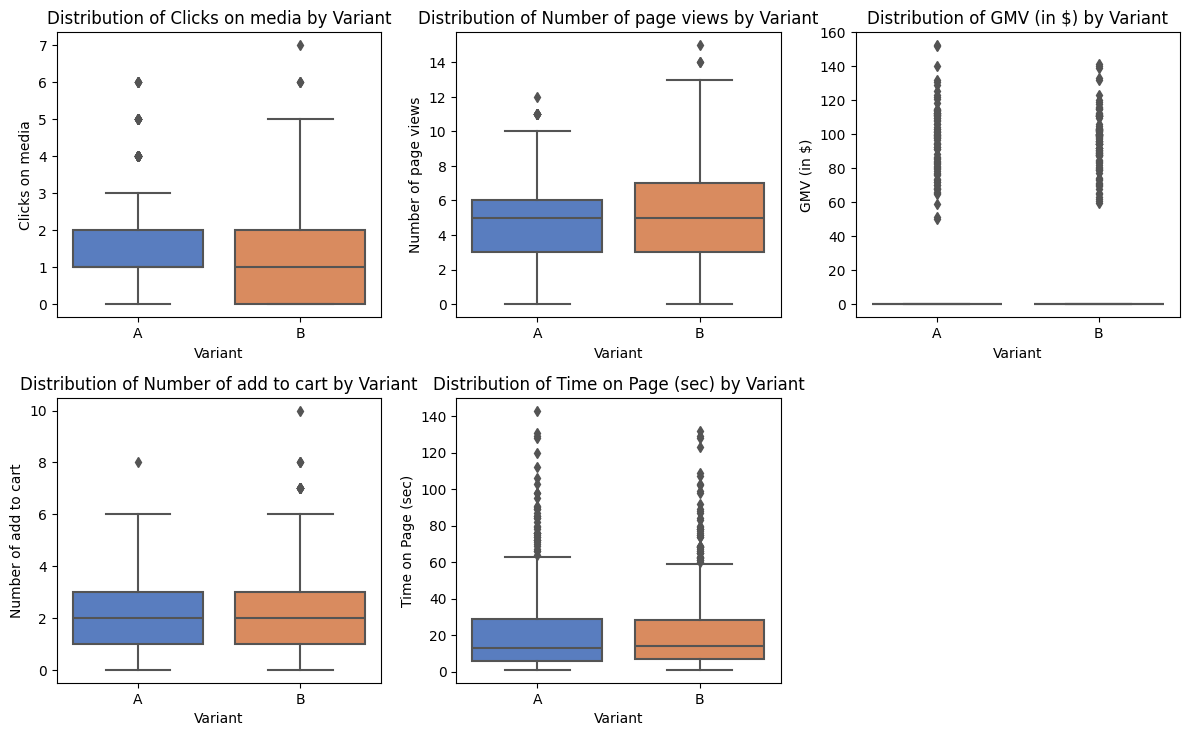

In [11]:
# Create subplots with 2 columns and a number of rows based on the number of columns_of_interest
n_rows = len(columns_of_interest)
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 18))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot mean distribution for each variable
for i, col in enumerate(columns_of_interest):
    sns.boxplot(x='Variant', y=col, data=df, ax=axes[i], palette='muted')
    axes[i].set_xlabel('Variant')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Distribution of {col} by Variant')
    
# Remove any unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Does GMV looks weired?<br/>Let's have a look distribution for all users and for purchased users.

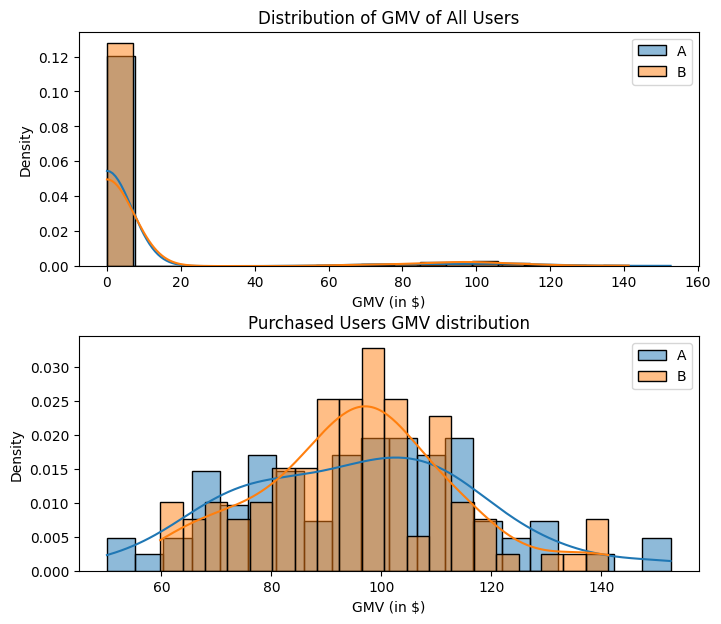

In [12]:
f, axes = plt.subplots(2, 1, figsize=(8, 7)) 
# distplot will not work anymore use histplot
# distributions of all users
sns.histplot(data=df.loc[df['Variant'] == 'A', 'GMV (in $)'], ax=axes[0], kde=True, label='A', stat='density',bins=20)
sns.histplot(data=df.loc[df['Variant'] == 'B', 'GMV (in $)'], ax=axes[0], kde=True, label='B', stat='density',bins=20)
axes[0].set_title('Distribution of GMV of All Users')
axes[0].legend()  

# distributions of purchasing users
sns.histplot(data=df.loc[(df['Variant'] == 'A') & (df['GMV (in $)'] > 0), 'GMV (in $)'], ax=axes[1], kde=True, label='A', stat='density', bins=20)
sns.histplot(data=df.loc[(df['Variant'] == 'B') & (df['GMV (in $)'] > 0), 'GMV (in $)'], ax=axes[1], kde=True, label='B', stat='density', bins=20)
axes[1].set_title('Purchased Users GMV distribution')
axes[1].legend()  

plt.subplots_adjust(hspace=0.3) 
plt.show()

## Use None-parametric Test to check if there is relationship between two catagorical variables

In [13]:
contingency_table = pd.crosstab(index=df['Variant'], columns=df['Interacted'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

#Statistical significance or not?
alpha = 0.05
if p_val < alpha:
    print("Statistically significant.")
else:
    print("No statistically significant.")

Chi-square statistic: 7.011386426861615
P-value: 0.008099293580522367
Degrees of freedom: 1
Expected frequencies table:
[[246. 754.]
 [246. 754.]]
Statistically significant.


## Conducting a t-test to assess whether the difference in 'Clicks on media' between A and B is statistically significant.

In [14]:
clicks_A = df[df['Variant'] == 'A']['Clicks on media']
clicks_B = df[df['Variant'] == 'B']['Clicks on media']

t_statistic, p_value = stats.ttest_ind(clicks_A, clicks_B, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Statistical significance or not?
if p_value < 0.05:
    print("Statistically significant.")
else:
    print("No statistically significant.")

T-statistic: 3.1710702328903153
P-value: 0.0015418577159884786
Statistically significant.


## Is there a statistically significant association between two categorical 'Variant' and 'Churned'?

In [15]:
contingency_table = pd.crosstab(index=df['Variant'], columns=df['Churned'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Result
alpha = 0.05
if p_val < alpha:
    print("Statistically significant.")
else:
    print("No statistically significant.")

Chi-square statistic: 4.055457326485364
P-value: 0.044028791496495766
Degrees of freedom: 1
Expected frequencies table:
[[963.  37.]
 [963.  37.]]
Statistically significant.


### Check the KPI-Bounce Rate
#### *Number of users who view less than 2 pages devided by total number of users

In [16]:
# Calculate bounce rate for A & B
bounce_rate_A = (df[df['Variant'] == 'A']['Number of page views'] <= 1).mean()
bounce_rate_B = (df[df['Variant'] == 'B']['Number of page views'] <= 1).mean()

print("Bounce Rate for Variant A:", bounce_rate_A)
print("Bounce Rate for Variant B:", bounce_rate_B)

Bounce Rate for Variant A: 0.046
Bounce Rate for Variant B: 0.028


### Run a T-test for Page Views


In [17]:
pv_A = df[df['Variant'] == 'A']['Number of page views']
pv_B = df[df['Variant'] == 'B']['Number of page views']

# Two-sample t-test
t_statistic, p_value = ttest_ind(pv_A, pv_B,equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Is bounce rates statistically significant?
alpha = 0.05
if p_value < alpha:
    print("Statistically significant.")
else:
    print("No statistically significant.")

T-statistic: -3.1881645133877003
P-value: 0.0014540761572158425
Statistically significant.


## Another KPI - Conversion Rate
#### *Number of users who complete purchases devided by total number of users

In [18]:
# Calculate conversion rate for Variant A and B
conversion_rate_A = (df[df['Variant'] == 'A']['GMV (in $)'] > 0.0).mean()
conversion_rate_B = (df[df['Variant'] == 'B']['GMV (in $)'] > 0.0).mean()

print("Conversion Rate for Variant A:", conversion_rate_A)
print("Conversion Rate for Variant B:", conversion_rate_B)


Conversion Rate for Variant A: 0.08
Conversion Rate for Variant B: 0.097


### Run T-test on Conversion/Purchase Amount

In [19]:
purchase_A = df[(df['Variant'] == 'A') & (df['GMV (in $)'] > 0.0)]['GMV (in $)']
purchase_B = df[(df['Variant'] == 'B') & (df['GMV (in $)'] > 0.0)]['GMV (in $)']

#Two-sample t-test
t_statistic, p_value = ttest_ind(purchase_A, purchase_B, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Is Purchase Amount statistically significant?
alpha = 0.05
if p_value < alpha:
    print("Statistically significant.")
else:
    print("No significant.")


T-statistic: 0.11825764792932787
P-value: 0.9060201289425032
No significant.


## What about Average Time Spent?

In [20]:
time_spent_A = df[df['Variant'] == 'A']['Time on Page (sec)']
time_spent_B = df[df['Variant'] == 'B']['Time on Page (sec)']

# Independent two-sample t-test
t_statistic, p_value = ttest_ind(time_spent_A, time_spent_B, equal_var=False)

print("T-test for Time on page (sec):")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

#results
alpha = 0.05
if p_value < alpha:
    print("Yes, it's significant.")
else:
    print("No significant.")

T-test for Time on page (sec):
T-statistic: 0.5554299489081426
P-value: 0.5786630478332149
No significant.


## KPI agian, Shopping Cart Abanonment Rate
#### *Number of users who abandoned cart devided by Number of users who added items to cart

In [21]:
# Abandonment Rate group by variant
abandonment_rates = df.groupby('Variant').apply(lambda x: 1 - (x['GMV (in $)'] > 0.0).sum() / (x['Number of add to cart'] > 0).sum())

print("Abandonment Rates:")
print(abandonment_rates)

Abandonment Rates:
Variant
A    0.906651
B    0.891741
dtype: float64


### Z-Test for Comparing Purchase Conversion Proportions Between Two Variants

In [22]:
var_A = df[df['Variant'] == 'A']
var_B = df[df['Variant'] == 'B']

count_A = (var_A['GMV (in $)'] > 0.0).sum()
count_B = (var_B['GMV (in $)'] > 0.0).sum()

#Total counts for each variant
nobs_A = (var_A['Number of add to cart'] > 0).sum()
nobs_B = (var_B['Number of add to cart'] > 0).sum()

#Two-sample proportion test
z_stat, p_val = proportions_ztest([count_A, count_B], [nobs_A, nobs_B])

print("Z-statistic:", z_stat)
print("P-value:", p_val)

# Is Abandonment statistically significant?
alpha = 0.05
if p_val < alpha:
    print("Statistically significant.")
else:
    print("No statistically significant.")

Z-statistic: -1.0357366825435268
P-value: 0.30032500397917594
No statistically significant.


## KPI - Average Revenue Per User(ARPU)
#### * Total purchased amount devided by number of users who complete purchases

In [23]:
# Average Revenue Per User(ARPU) for A & B
arpu_A = df.loc[(df['Variant'] == 'A') & (df['GMV (in $)'] > 0.0), 'GMV (in $)'].mean()
arpu_B = df.loc[(df['Variant'] == 'B') & (df['GMV (in $)'] > 0.0), 'GMV (in $)'].mean()

print("Average Revenue Per User (ARPU) for Variant A:", arpu_A)
print("Average Revenue Per User (ARPU) for Variant B:", arpu_B)

Average Revenue Per User (ARPU) for Variant A: 96.124875
Average Revenue Per User (ARPU) for Variant B: 95.76835051546392


In [24]:
ARPU_A = df.loc[(df['Variant'] == 'A') & (df['GMV (in $)'] > 0.0), 'GMV (in $)']
ARPU_B = df.loc[(df['Variant'] == 'B') & (df['GMV (in $)'] > 0.0), 'GMV (in $)']

# Two-sample t-test
t_statistic, p_value = ttest_ind(ARPU_A, ARPU_B, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# statistically significant or not?
alpha = 0.05
if p_value < alpha:
    print("Statistically significant.")
else:
    print("No statistically significant.")


T-statistic: 0.11825764792932787
P-value: 0.9060201289425032
No statistically significant.


# Can we try predict 'GMV (in $)' based on 'Time on Page (sec)'?!

#### *Linear Regression Modeling

Variant A:
                            OLS Regression Results                            
Dep. Variable:        Q('GMV (in $)')   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.153
Date:                Sun, 10 Mar 2024   Prob (F-statistic):             0.0133
Time:                        08:12:00   Log-Likelihood:                -4703.6
No. Observations:                1000   AIC:                             9411.
Df Residuals:                     998   BIC:                             9421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept      

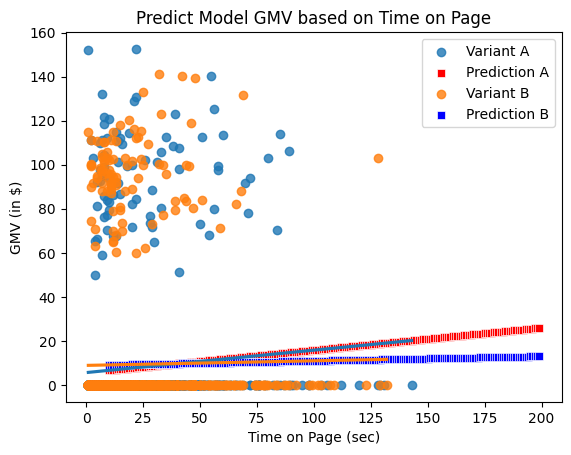

In [25]:
from statsmodels.formula.api import ols
#regression model A
mdl_gmv_vs_time_A = ols("Q('GMV (in $)') ~ Q('Time on Page (sec)')", data=df[df['Variant'] == 'A']).fit()

print("Variant A:")
print(mdl_gmv_vs_time_A.summary())

# Fit regression model B
mdl_gmv_vs_time_B = ols("Q('GMV (in $)') ~ Q('Time on Page (sec)')", data=df[df['Variant'] == 'B']).fit()

print("\nVariant B:")
print(mdl_gmv_vs_time_B.summary())

# Generate explanatory data
explanatory_data = pd.DataFrame({"Time on Page (sec)": np.arange(10, 200)})
print(explanatory_data)

# Generate predictions A
prediction_data_A = explanatory_data.assign(**{"GMV (in $)": mdl_gmv_vs_time_A.predict(explanatory_data)})

# Plot regression lines and original data points for Variant A
fig = plt.figure()
sns.regplot(x="Time on Page (sec)", y="GMV (in $)", ci=None, data=df[df['Variant'] == 'A'], label="Variant A")
sns.scatterplot(x="Time on Page (sec)", y="GMV (in $)", data=prediction_data_A, color="red", marker="s", label="Prediction A")

# Generate predictions B
prediction_data_B = explanatory_data.assign(**{"GMV (in $)": mdl_gmv_vs_time_B.predict(explanatory_data)})

# Plot regression lines and original data points for Variant B
sns.regplot(x="Time on Page (sec)", y="GMV (in $)", ci=None, data=df[df['Variant'] == 'B'], label="Variant B")
sns.scatterplot(x="Time on Page (sec)", y="GMV (in $)", data=prediction_data_B, color="blue", marker="s", label="Prediction B")
plt.title('Predict Model GMV based on Time on Page')
plt.legend()
plt.show()

## Can we predict the probability of churn?

In [26]:
import statsmodels.api as sm

# Binomial logistic regression for 'Churned' variable
X = sm.add_constant(df['Variant'].apply(lambda x: 1 if x == 'B' else 0))
y = df['Churned']
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print("Logistic Regression for Churned:")
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.157142
         Iterations 8
Logistic Regression for Churned:
                           Logit Regression Results                           
Dep. Variable:                Churned   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1998
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Mar 2024   Pseudo R-squ.:                0.007251
Time:                        08:12:01   Log-Likelihood:                -314.28
converged:                       True   LL-Null:                       -316.58
Covariance Type:            nonrobust   LLR p-value:                   0.03214
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0320      0.151    -20.086      0.000      -3.328      -2.

In [27]:
from statsmodels.formula.api import ols

# Fit the regression model for Variant A
mdl_clicks_vs_variant_A = ols("Q('Clicks on media') ~ Variant", data=df[df['Variant'] == 'A']).fit()

# Print the model summary for Variant A
print("Variant A:")
print(mdl_clicks_vs_variant_A.summary())

# Fit the regression model for Variant B
mdl_clicks_vs_variant_B = ols("Q('Clicks on media') ~ Variant", data=df[df['Variant'] == 'B']).fit()

# Print the model summary for Variant B
print("\nVariant B:")
print(mdl_clicks_vs_variant_B.summary())




Variant A:
                             OLS Regression Results                             
Dep. Variable:     Q('Clicks on media')   R-squared:                      -0.000
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sun, 10 Mar 2024   Prob (F-statistic):                nan
Time:                          08:12:01   Log-Likelihood:                -1625.6
No. Observations:                  1000   AIC:                             3253.
Df Residuals:                       999   BIC:                             3258.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4950

In [28]:
import statsmodels.api as sm

# Binomial logistic regression for 'Interacted' variable
X = sm.add_constant(df['Variant'].apply(lambda x: 1 if x == 'B' else 0))
y = df['Interacted']
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print("Logistic Regression for Interacted:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.556073
         Iterations 5
Logistic Regression for Interacted:
                           Logit Regression Results                           
Dep. Variable:             Interacted   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1998
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Mar 2024   Pseudo R-squ.:                0.003271
Time:                        08:12:01   Log-Likelihood:                -1112.1
converged:                       True   LL-Null:                       -1115.8
Covariance Type:            nonrobust   LLR p-value:                  0.006897
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2657      0.076     16.580      0.000       1.116      

In [29]:
import os
os.system("say 'Yeaheeeeee! Your script has finished.'")

0